# Downloading Data

In [1]:
!gdown 14taxlYvO3NSYjmZU7gA8OLS0ysC0N_ZO

Downloading...
From: https://drive.google.com/uc?id=14taxlYvO3NSYjmZU7gA8OLS0ysC0N_ZO
To: /content/Asssignment4_Data.xlsx
100% 12.2k/12.2k [00:00<00:00, 23.7MB/s]


# Imports

In [2]:
from functools import partial
from typing import List

# Data Handler
import numpy as np
import pandas as pd

# Data Visualizer
from IPython.display import display

# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

# Decision Tree
from sklearn import tree

# Evaluating Prediction
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

# Hypertuning
from sklearn.model_selection import GridSearchCV

# Plot
import matplotlib.pyplot as plt


# Question 1

1. Compute and show the conditional probability distribution for each feature. Explain how
you got these values and show your work.
Note: You are expected to do this part of the question by hand. Explain how you got the
probability distribution for at least two features in detail.

We can calculate the mean and variance: $\mu$ = 6.8, $\sigma$ = 3.23. So now we have probability distribution $\mathcal{N}(6.8,3.23)$ with the density function $f(x)= \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-\mu}{\sigma})^2}$. We can use $f(x)$ just like $p(X_1=x)$. Thus for finding $p(X_1=x|C=c)$, we just need to calc $\mu$ and $\sigma$ for data that $C=c$ then that would be a good estimation for $p(X_1=x|C=c)$. First off "Local Price": Let's say $c_1$= Apartment, $c_2$= House, $c_3$= Condo.

$$
f_1(x|c_1)= \frac{1}{3.62 \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-7.33}{3.62})^2}
$$
$$
f_1(x|c_2)= \frac{1}{0.57 \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-5.76}{0.57})^2}
$$
$$
f_1(x|c_3)= \frac{1}{4.61 \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-7.42}{4.61})^2}
$$

For "Bathrooms":

$$
f_2(x|c_1)= \frac{1}{0.56 \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-1.28}{0.56})^2}
$$
$$
f_2(x|c_2)= \frac{1}{0.19 \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-1.07}{0.19})^2}
$$
$$
f_2(x|c_3)= \frac{1}{0.6 \sqrt{2\pi}} e^{\frac{1}{2} \large(\frac{x-1.34}{0.6})^2}
$$

Now we calculate:
$$
f(x|C=c_1)= f_1(x|C=c_1)f_2(x|C=c_1)\cdots f_8(x|C=c_1) \times p(C=c_1)
$$
and we predict the class based on $i=\mathcal{argmax}\{f(x|C=c_i)\}$


2.Using your conditional probability table, write a Python code that will compute the
probabilities for each example in the test data. Your program should output the
probabilities of each class as well as the final classification based on the MAP rule.
Note: You should hard-code the conditional probabilities from the previous step into your
code.

In [3]:
def load_data(path: str= 'Asssignment4_Data.xlsx', descirbe: bool=True):
    train = pd.read_excel(path, sheet_name=0, index_col=0)
    test = pd.read_excel(path, sheet_name=1, index_col=0)

    X_train = (train[train.columns[:-1]])
    y_train = (train[train.columns[-1]])
    
    X_test = (test[test.columns[:-1]])
    y_test = (test[test.columns[-1]])

    if descirbe:
        # data_table.enable_dataframe_formatter()
        print("\t\t\t\t\t\t******* Train Dataset *******")
        display(train)
        print("describe")
        display(train.describe())
        print("\t\t\t\t\t\t******* Test Dataset *******")
        display(test)
        print("describe")
        display(test.describe())

    return X_train, y_train, X_test, y_test


# fit a probability distribution to a univariate data sample
def normal_dist(x:pd.DataFrame , mean: float , std: float):
    
    denominator= (np.sqrt(2 * np.pi) * std)
    power = -(x-mean)**2 / (2 * std**2 )
    numerator= np.exp(power)
    prob_density = (numerator/denominator)

    return prob_density

def fit_distribution(data: pd.DataFrame):
	# estimate parameters
	mu = data.mean()
	sigma = data.std()
	# print(mu, sigma)
	# fit distribution
	dist = partial(normal_dist, mean=mu, std=sigma)
	return dist

def calculate_prior_probability(df: pd.DataFrame, classes: List):
    prior= []
    for i in classes:
        prior.append(len(df[df[df.columns[-1]]==i])/len(df))
    return prior

def naive_bayes(X: pd.DataFrame, y: pd.DataFrame):
    labels = sorted(list(y.unique()))
    # print(labels)
    prior = calculate_prior_probability(pd.concat([X,y], axis=1), labels)
    # print(f'prior: {prior}')
    proba = [fit_distribution(X[y == label]) for label in labels]
    # print(f'proba: {proba}')
    return proba, prior, labels

def naive_bayes_predict(X: pd.DataFrame, proba: List, prior: List):
    preds = []
    for _ , x in X.iterrows():
        likelihood = np.ones(len(prior))
        for i, label in enumerate(labels):
            likelihood[i] = np.prod(proba[i](x)) * prior[i]
        preds.append(likelihood[:])
    return preds

In [4]:
X_train, y_train, X_test, y_test = load_data("Asssignment4_Data.xlsx")

						******* Train Dataset *******


,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
House ID,,,,,,,,,
1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo


describe


,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,6.807490,1.225000,6.264565,1.479850,1.200000,6.600000,3.250000,37.450000
std,3.232588,0.472257,2.594524,0.632519,0.676679,1.231174,0.786398,13.276314
min,3.891000,1.000000,2.275000,0.975000,0.000000,5.000000,2.000000,14.000000
25%,5.042700,1.000000,4.455000,1.121000,1.000000,6.000000,3.000000,30.000000
50%,5.716050,1.000000,5.685000,1.308000,1.000000,6.000000,3.000000,36.000000
75%,6.968700,1.125000,7.276500,1.501000,2.000000,7.000000,3.250000,47.000000
max,16.420200,2.500000,12.800000,3.420000,2.000000,10.000000,5.000000,62.000000


						******* Test Dataset *******


,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
House ID,,,,,,,,,
24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


describe


,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000
mean,8.747080,1.400000,7.240540,1.592800,1.700000,7.0,3.400000,31.200000
std,2.138842,0.223607,1.542272,0.253155,0.447214,1.0,0.547723,17.626684
min,6.093100,1.000000,5.000000,1.200000,1.000000,6.0,3.000000,3.000000
25%,8.140000,1.500000,6.726500,1.504000,1.500000,6.0,3.000000,30.000000
50%,8.360700,1.500000,7.326200,1.652000,2.000000,7.0,3.000000,31.000000
75%,9.141600,1.500000,8.000000,1.777000,2.000000,8.0,4.000000,44.000000
max,12.000000,1.500000,9.150000,1.831000,2.000000,8.0,4.000000,48.000000


In [5]:
proba, prior, labels = naive_bayes(X_train, y_train)
pred_proba = naive_bayes_predict(X_test, proba, prior)
y_pred = [labels[np.argmax(p)] for p in pred_proba]
print("Preds:",y_pred)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("f1 score:", f1_score(y_test,y_pred, labels=labels, average="micro"))
print()
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))

Preds: ['House', 'Apartment', 'Apartment', 'Apartment', 'Condo']
Number of mislabeled points out of a total 5 points : 4
f1 score: 0.20000000000000004

Confusion Matrix
 [[1 1 1]
 [0 0 0]
 [2 0 0]]


In [6]:
pred_proba

[array([1.98214738e-06, 1.71173416e-06, 2.27833463e-05]),
 array([4.85570901e-07, 2.67911730e-07, 4.48007655e-13]),
 array([6.40286727e-08, 2.45667037e-08, 1.38811262e-09]),
 array([1.14754541e-06, 1.00808724e-06, 1.04019926e-15]),
 array([4.07429094e-07, 4.30509323e-07, 1.97825317e-31])]

In [7]:
gnb = GaussianNB()
# gnb = MultinomialNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(y_pred)
print(list(y_test))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print(f1_score(y_test,y_pred, labels=labels, average="micro"))
print()
print(confusion_matrix(y_test, y_pred))

['House' 'Apartment' 'Apartment' 'Apartment' 'Condo']
['Apartment', 'House', 'House', 'Apartment', 'Apartment']
Number of mislabeled points out of a total 5 points : 4
0.20000000000000004

[[1 1 1]
 [0 0 0]
 [2 0 0]]


# Question 2

Using the same housing data (Asssignment4_Data.xlsx), construct a decision tree classifier. You
can use the implementation available on Sci-Kit Learn. Perform the following experiments and
briefly (2-4 sentences) answer the questions.

1. Use the default parameters.

> a. What is the accuracy on the training set? \\
> b. What is the accuracy on the test set?




In [8]:
X_train, y_train, X_test, y_test = load_data("Asssignment4_Data.xlsx", False)

In [9]:
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

acc_train = clf.predict(X_train)
print("Training Report:")
print(classification_report(y_train, acc_train, target_names=labels))

print("Testing Report:")
print("y_pred:", y_pred)
print("y_test:", list(y_test))
print(classification_report(y_test, y_pred, target_names=labels, zero_division=0))

Training Report:
              precision    recall  f1-score   support

   Apartment       1.00      1.00      1.00         7
       Condo       1.00      1.00      1.00         6
       House       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Testing Report:
y_pred: ['Condo' 'Condo' 'Condo' 'Apartment' 'Apartment']
y_test: ['Apartment', 'House', 'House', 'Apartment', 'Apartment']
              precision    recall  f1-score   support

   Apartment       1.00      0.67      0.80         3
       Condo       0.00      0.00      0.00         0
       House       0.00      0.00      0.00         2

    accuracy                           0.40         5
   macro avg       0.33      0.22      0.27         5
weighted avg       0.60      0.40      0.48         5



2. What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value. 

it stops the model from overfitting or modeling the noise as well and decreases the training acc


In [10]:
tree_para = {'criterion': ["entropy", "gini"], 'max_depth': list(range(3,21))}
clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_para, cv=5)
y_pred = clf.fit(X_train, y_train).predict(X_test)

display(pd.DataFrame(clf.cv_results_)[["rank_test_score", "param_max_depth", 
                                    #  "split0_test_score", "split1_test_score", "split2_test_score",
                                    #  "split3_test_score", "split4_test_score",
                                      "mean_test_score", "std_test_score",]])
print("Best Params:", clf.best_params_)

acc_train = clf.predict(X_train)
print("Training Report:")
print(classification_report(y_train, acc_train, target_names=labels))

print("Testing Report:")
print("y_pred:", y_pred)
print("y_test:", list(y_test))
print(classification_report(y_test, y_pred, target_names=labels, zero_division=0))

,rank_test_score,param_max_depth,mean_test_score,std_test_score
0,10,3,0.40,0.122474
1,31,4,0.30,0.291548
2,31,5,0.30,0.187083
3,31,6,0.30,0.187083
4,31,7,0.30,0.244949
5,10,8,0.40,0.200000
6,10,9,0.40,0.254951
7,4,10,0.45,0.187083
8,4,11,0.45,0.187083
9,2,12,0.50,0.273861


Best Params: {'criterion': 'entropy', 'max_depth': 20}
Training Report:
              precision    recall  f1-score   support

   Apartment       1.00      1.00      1.00         7
       Condo       1.00      1.00      1.00         6
       House       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Testing Report:
y_pred: ['Condo' 'Condo' 'House' 'Apartment' 'Apartment']
y_test: ['Apartment', 'House', 'House', 'Apartment', 'Apartment']
              precision    recall  f1-score   support

   Apartment       1.00      0.67      0.80         3
       Condo       0.00      0.00      0.00         0
       House       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.67      0.39      0.49         5
weighted avg       1.00      0.60      0.75         5



3. Why does restricting the depth have such a strong effect on the classifier performance?

to reduce the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

4. Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace
the path taken towards classification) and provide a classification for the following: Local Price: 9.0384, Bathrooms: 1, Land Area: 7.8, Living area: 1.5, \# Garages: 1.5, \# Rooms: 7, \# Bedrooms: 3, Age of home: 23

Age of home(23) <= 36 $\xrightarrow{Yes}$ Local Price(9.03) <=8.4 $\xrightarrow{No}$ class is apartment

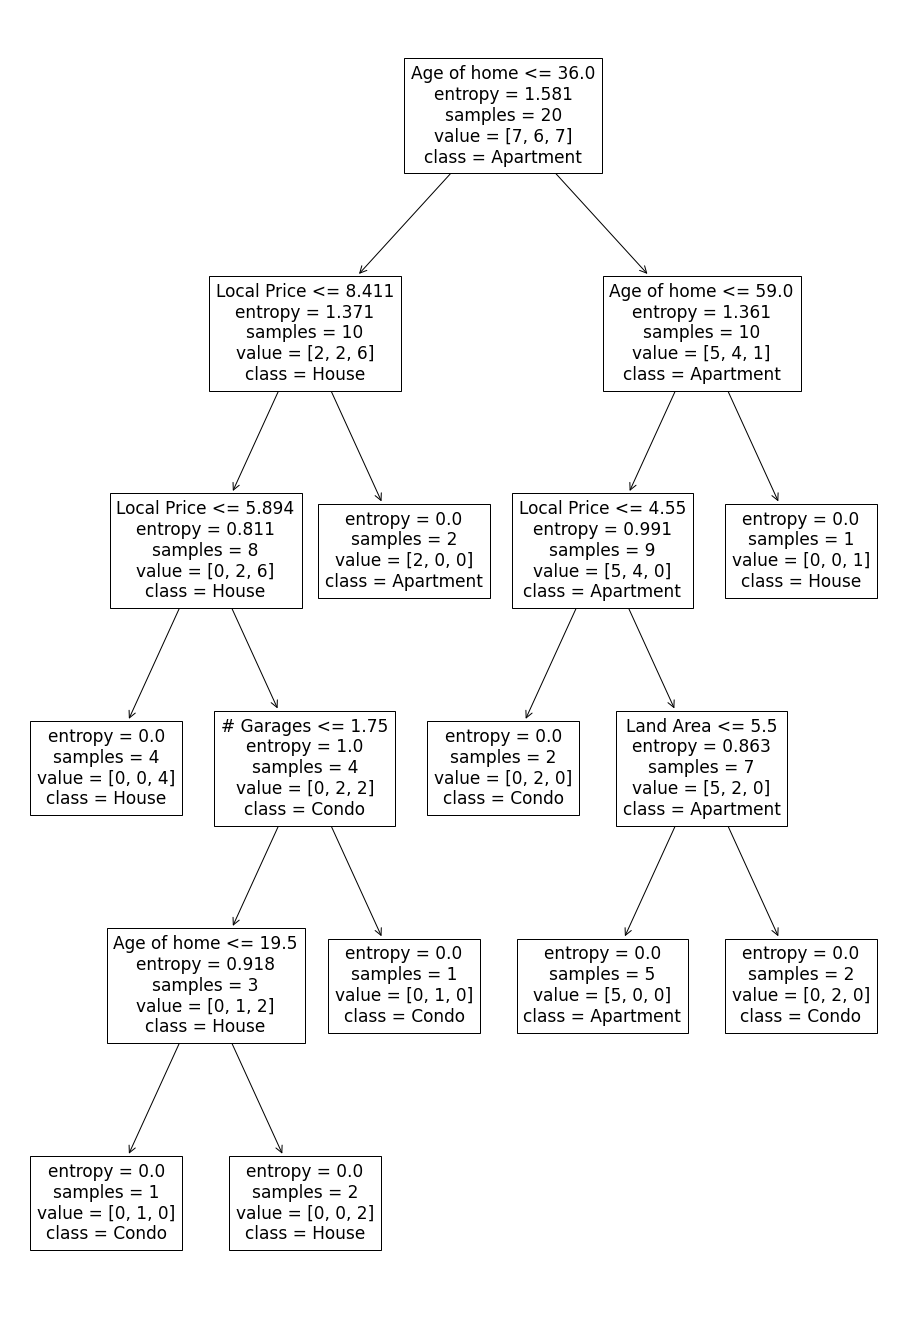

In [11]:
fig, ax = plt.subplots(figsize=(16,24))

clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 8)
y_pred = clf.fit(X_train, y_train).predict(X_test)


_ = tree.plot_tree(clf, label='all', class_names=labels, feature_names=X_train.columns, ax=ax,)

In [12]:
clf.predict(pd.DataFrame({"Local Price": [9.0384], "Bathrooms": [1], "Land Area":[ 7.8], "Living area": [1.5], "# Garages": [1.5], "# Rooms": [7], "# Bedrooms": [3], "Age of home": [23]}))

array(['Apartment'], dtype=object)

#Question 3

Using the same housing data (Asssignment4_Data.xlsx), implement the k-nearest neighbor
algorithm to perform classification. Your program should take in the number of neighbors k as
input and classify each example in the test set based on the majority vote from the chosen
neighbors. Compute the accuracy of your approach for different number of neighbors, ranging
from 1 to 5 and explain the results briefly using a plot. You can use Euclidean distance to choose
the neighbor points.

In [13]:
X_train, y_train, X_test, y_test = load_data("Asssignment4_Data.xlsx", False)

In [14]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(x1, x2):
	distance = 0.0
	for i, elem in enumerate(x1):
		distance += (elem - x2[i])**2
	return np.sqrt(distance)

class KNeighborsClassifier():
	def __init__(self, k=None, meter=None):
		self.k = k
		self.dist = meter
  
	def fit(self, X_train, y_train):
		self.X = X_train
		self.y = y_train
		self.classes = sorted(list(y_train.unique()))
  
		return self

	# Locate the most similar neighbors
	def get_neighbors(self, x_test):
		distances = list()
  
		for i, x in self.X.iterrows():
			dist = euclidean_distance(x_test, x)
			distances.append((self.y[i], dist))
   
		distances.sort(key=lambda dist: dist[1])
		# print(distances)
		neighbors = [distances[i][0] for i in range(self.k)]
		return neighbors

	# Just for sklearn gridsearch
	def get_params(self, deep=True):
		return {'k': self.k,
		        'meter':self.dist}

	# Just for sklearn gridsearch
	def set_params(self, **parameters):
		for parameter, value in parameters.items():
			setattr(self, parameter, value)
		return self
	
	# Make a classification prediction with neighbors
	def predict(self, X_test):
		pred = []
		
		for i, x in X_test.iterrows():
			neighbors = self.get_neighbors(x,)
			pred.append(max(set(neighbors), key=neighbors.count))
   
		return pred

In [15]:
clf = KNeighborsClassifier(k=6, meter=euclidean_distance)
clf.fit(X_train, y_train)
clf.predict(X_test)

['Apartment', 'Apartment', 'House', 'House', 'House']

In [16]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=6, metric="euclidean")
clf.fit(X_train, y_train)
clf.predict(X_test)

array(['Apartment', 'Apartment', 'House', 'House', 'House'], dtype=object)

In [17]:
neighbors_para = {'k': list(range(2,15)), 'meter':[euclidean_distance]}
clf = GridSearchCV(KNeighborsClassifier(), neighbors_para, cv=5, scoring='accuracy')
y_pred = clf.fit(X_train, y_train).predict(X_test)

display(pd.DataFrame(clf.cv_results_)[["rank_test_score", "param_k", 
                                    #  "split0_test_score", "split1_test_score", "split2_test_score",
                                    #  "split3_test_score", "split4_test_score",
                                      "mean_test_score", "std_test_score",]])
print("Best Params:", clf.best_params_)

acc_train = clf.predict(X_train)
print("Training Report:")
print(classification_report(y_train, acc_train, target_names=labels))

print("Testing Report:")
print("y_pred:", y_pred)
print("y_test:", list(y_test))
print(classification_report(y_test, y_pred, target_names=np.unique(y_test), zero_division=0))

,rank_test_score,param_k,mean_test_score,std_test_score
0,7,2,0.40,0.200000
1,2,3,0.50,0.158114
2,5,4,0.45,0.187083
3,1,5,0.55,0.100000
4,2,6,0.50,0.158114
5,2,7,0.50,0.158114
6,5,8,0.45,0.244949
7,8,9,0.35,0.200000
8,10,10,0.30,0.187083
9,8,11,0.35,0.122474


Best Params: {'k': 5, 'meter': <function euclidean_distance at 0x7fe76543e290>}
Training Report:
              precision    recall  f1-score   support

   Apartment       0.57      0.57      0.57         7
       Condo       0.33      0.17      0.22         6
       House       0.60      0.86      0.71         7

    accuracy                           0.55        20
   macro avg       0.50      0.53      0.50        20
weighted avg       0.51      0.55      0.51        20

Testing Report:
y_pred: ['Apartment', 'Apartment', 'House', 'House', 'House']
y_test: ['Apartment', 'House', 'House', 'Apartment', 'Apartment']
              precision    recall  f1-score   support

   Apartment       0.50      0.33      0.40         3
       House       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5

